# Probe Detection Using Deep Learning
---

### Outline
- System Selection
- 
- Model Testing
    - Train 
    - 
- Inference with Custom Model
- Evaluation
- Future Improvements

The results of this code are accompanied in the following [Report](REport).

## System Selection and Setup


The selection test models are **YOLOv8, RT-DETR, YOLO-NAS ** based on:
- State of Art (speed and acccuracy)
- Reasonable Computational Requirements
- Edge Deployment Scnearios (Jetson platforms) 

### Preprocessing
Using Roboflows Dataset tool I apply the following preprocessing.

    1. Auto-Orient
    2. Resize (Strectch 640x640)
    3. Auto-Adjust Contrast (Using Adaptive Equalization)
    4. Grayscale
#3 Augementation
Creating augmented version fo each image in training set by **By applying Horizontal Flip, and Vertical Flip**

## YOLOv8 Test

Is a state of the art with reasonable computational requirements, speed, and accuracy. 


In [1]:
import os
from ultralytics import YOLO
from IPython import display
from IPython.display import display, Image


# Set up home directory
HOME = os.getcwd()
print(f"Current working directory: {HOME}")

# Install required library (ensure ultralytics is installed)
!pip install ultralytics

# Verify YOLO setup
import ultralytics
ultralytics.checks()

# Ensure dataset directory exists
datasets_path = os.path.join(HOME, 'data/probe_preprocessed_YOLOv8')
os.makedirs(datasets_path, exist_ok=True)

# Change directory to datasets (if needed)
os.chdir(datasets_path)
print(f"Dataset directory: {os.getcwd()}")



Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24201MiB)
Setup complete ✅ (32 CPUs, 125.6 GB RAM, 134.7/960.2 GB disk)


Dataset directory: /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8


### Train YOLOv8 model

In [2]:
model = YOLO('yolov8l.pt')  # Change 'yolov8n.pt' to the desired YOLOv8 variant
model.train(data=f"{datasets_path}/data.yaml", epochs=50, batch=16, imgsz=640)

100%|██████████| 83.7M/83.7M [00:01<00:00, 77.0MB/s]


New https://pypi.org/project/ultralytics/8.3.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24201MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm

train: Scanning /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/train/labels.cache... 648 images, 1 backgrounds, 0 corrupt: 100%|██████████| 648/648 [00:00<?, ?it/s]
/home/cjs/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.1G      1.833      4.076      1.996         12        640: 100%|██████████| 41/41 [00:06<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         61         61          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.1G      2.134      3.017      2.276         19        640: 100%|██████████| 41/41 [00:06<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         61         61   0.000827       0.18   0.000501   0.000241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.1G      2.036      2.695      2.203         18        640: 100%|██████████| 41/41 [00:06<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         61         61    0.00211     0.0164   0.000189   4.67e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.1G      2.001      2.681      2.194          9        640: 100%|██████████| 41/41 [00:06<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         61         61   0.000956     0.0164   0.000106    4.5e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.2G      1.873      2.497       2.06         17        640: 100%|██████████| 41/41 [00:06<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         61         61    0.00056      0.131   0.000302   0.000137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.2G      1.799      2.316      2.031         16        640: 100%|██████████| 41/41 [00:06<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         61         61      0.298       0.18      0.103     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.2G      1.775      2.266      1.985         14        640: 100%|██████████| 41/41 [00:06<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         61         61      0.331      0.213      0.217     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.1G      1.654      2.051      1.908         14        640: 100%|██████████| 41/41 [00:06<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         61         61      0.416      0.432       0.35      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.2G      1.679      2.075      1.902         13        640: 100%|██████████| 41/41 [00:06<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         61         61      0.279      0.262      0.192     0.0734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.2G      1.609      2.006      1.863         14        640: 100%|██████████| 41/41 [00:06<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         61         61      0.667      0.607       0.68      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.2G      1.554      1.937      1.811          9        640: 100%|██████████| 41/41 [00:06<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         61         61      0.681      0.672      0.724       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.1G      1.522      1.772       1.78         13        640: 100%|██████████| 41/41 [00:06<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         61         61      0.483      0.459      0.426      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.2G      1.476      1.758      1.738         14        640: 100%|██████████| 41/41 [00:06<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         61         61      0.763      0.529       0.65      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.2G      1.466      1.721       1.73         12        640: 100%|██████████| 41/41 [00:06<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         61         61      0.736       0.64      0.731       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.2G      1.453      1.726      1.726         11        640: 100%|██████████| 41/41 [00:06<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         61         61      0.578      0.517      0.521      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.1G      1.367      1.522      1.647         10        640: 100%|██████████| 41/41 [00:06<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         61         61      0.707      0.435      0.572       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.2G      1.361      1.612      1.662         12        640: 100%|██████████| 41/41 [00:06<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         61         61      0.878      0.639      0.799      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.2G      1.351      1.504      1.647         13        640: 100%|██████████| 41/41 [00:06<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         61         61      0.742      0.557      0.631      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.2G        1.3      1.469       1.61         14        640: 100%|██████████| 41/41 [00:06<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         61         61      0.542      0.678      0.559      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.1G      1.252      1.373      1.556         15        640: 100%|██████████| 41/41 [00:06<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         61         61      0.882      0.733      0.898      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.2G      1.297      1.431      1.589         15        640: 100%|██████████| 41/41 [00:06<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         61         61      0.839      0.705      0.841      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.2G      1.221      1.327      1.525         13        640: 100%|██████████| 41/41 [00:06<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         61         61      0.742      0.754      0.816      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.2G      1.205      1.335      1.536         11        640: 100%|██████████| 41/41 [00:06<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         61         61      0.811      0.869      0.893      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.1G      1.178      1.286      1.493         15        640: 100%|██████████| 41/41 [00:06<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         61         61      0.868      0.753      0.844      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.2G      1.154      1.225      1.471         15        640: 100%|██████████| 41/41 [00:06<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         61         61      0.882      0.737      0.879      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.2G      1.109      1.126      1.434          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         61         61      0.876       0.81      0.875      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.2G      1.107      1.133       1.43         17        640: 100%|██████████| 41/41 [00:06<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         61         61      0.876      0.924      0.938      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.1G      1.149      1.163      1.479         13        640: 100%|██████████| 41/41 [00:06<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         61         61      0.876      0.813      0.896      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.2G        1.1      1.104      1.442         18        640: 100%|██████████| 41/41 [00:06<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         61         61      0.913      0.869      0.922      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.2G      1.063      1.122      1.415         10        640: 100%|██████████| 41/41 [00:06<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         61         61      0.944      0.885      0.923       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.2G      1.067      1.101      1.409         15        640: 100%|██████████| 41/41 [00:06<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         61         61      0.898      0.866      0.928      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.1G     0.9993      1.016      1.369         13        640: 100%|██████████| 41/41 [00:06<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         61         61      0.926      0.817      0.928      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.2G      1.065      1.049      1.409         12        640: 100%|██████████| 41/41 [00:06<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         61         61      0.949      0.934      0.957      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.2G     0.9459     0.9472      1.311         15        640: 100%|██████████| 41/41 [00:06<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         61         61      0.913      0.856      0.915      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.2G      1.015      1.019      1.377          9        640: 100%|██████████| 41/41 [00:06<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         61         61      0.884      0.885       0.92      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.1G     0.9571     0.9763      1.351          9        640: 100%|██████████| 41/41 [00:06<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         61         61       0.92      0.948      0.955      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.2G     0.9678      0.924      1.327         11        640: 100%|██████████| 41/41 [00:06<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all         61         61      0.942      0.902      0.931      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.2G     0.9236     0.8792      1.294         13        640: 100%|██████████| 41/41 [00:06<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         61         61      0.939      0.852       0.94      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.2G      0.918     0.8623      1.311         16        640: 100%|██████████| 41/41 [00:06<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         61         61      0.949      0.913      0.949      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.1G     0.9062     0.8302      1.292         16        640: 100%|██████████| 41/41 [00:06<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         61         61      0.875      0.934      0.938      0.763


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.2G     0.8199     0.7315      1.306          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         61         61      0.934      0.928      0.972      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.2G     0.8212      0.713      1.304          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         61         61      0.927      0.902      0.949      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.2G     0.7755     0.6374      1.255          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         61         61      0.922      0.934      0.953      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.1G      0.754     0.6415      1.257          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         61         61      0.959      0.934      0.966      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.2G     0.7646     0.6421      1.241          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         61         61       0.98      0.934      0.966      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.2G     0.7275     0.6219      1.237          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         61         61      0.949      0.951      0.964      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.2G     0.7093     0.5966      1.212          6        640: 100%|██████████| 41/41 [00:06<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         61         61      0.965      0.912      0.954      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.1G     0.6978     0.5876      1.212          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         61         61      0.962      0.934      0.955      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.2G     0.6687     0.5558      1.187          7        640: 100%|██████████| 41/41 [00:06<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         61         61      0.963      0.934      0.954      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.2G     0.6771     0.5786      1.188          8        640: 100%|██████████| 41/41 [00:06<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         61         61      0.966      0.934      0.954      0.798



50 epochs completed in 0.102 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 87.6MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24201MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]


                   all         61         61      0.949      0.951      0.964      0.819
Speed: 0.1ms preprocess, 3.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x75a418078370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [23]:
TRAIN_RESULTS = os.path.join(HOME, 'data/probe_preprocessed_YOLOv8/runs/detect/train8')

### Display Training Results

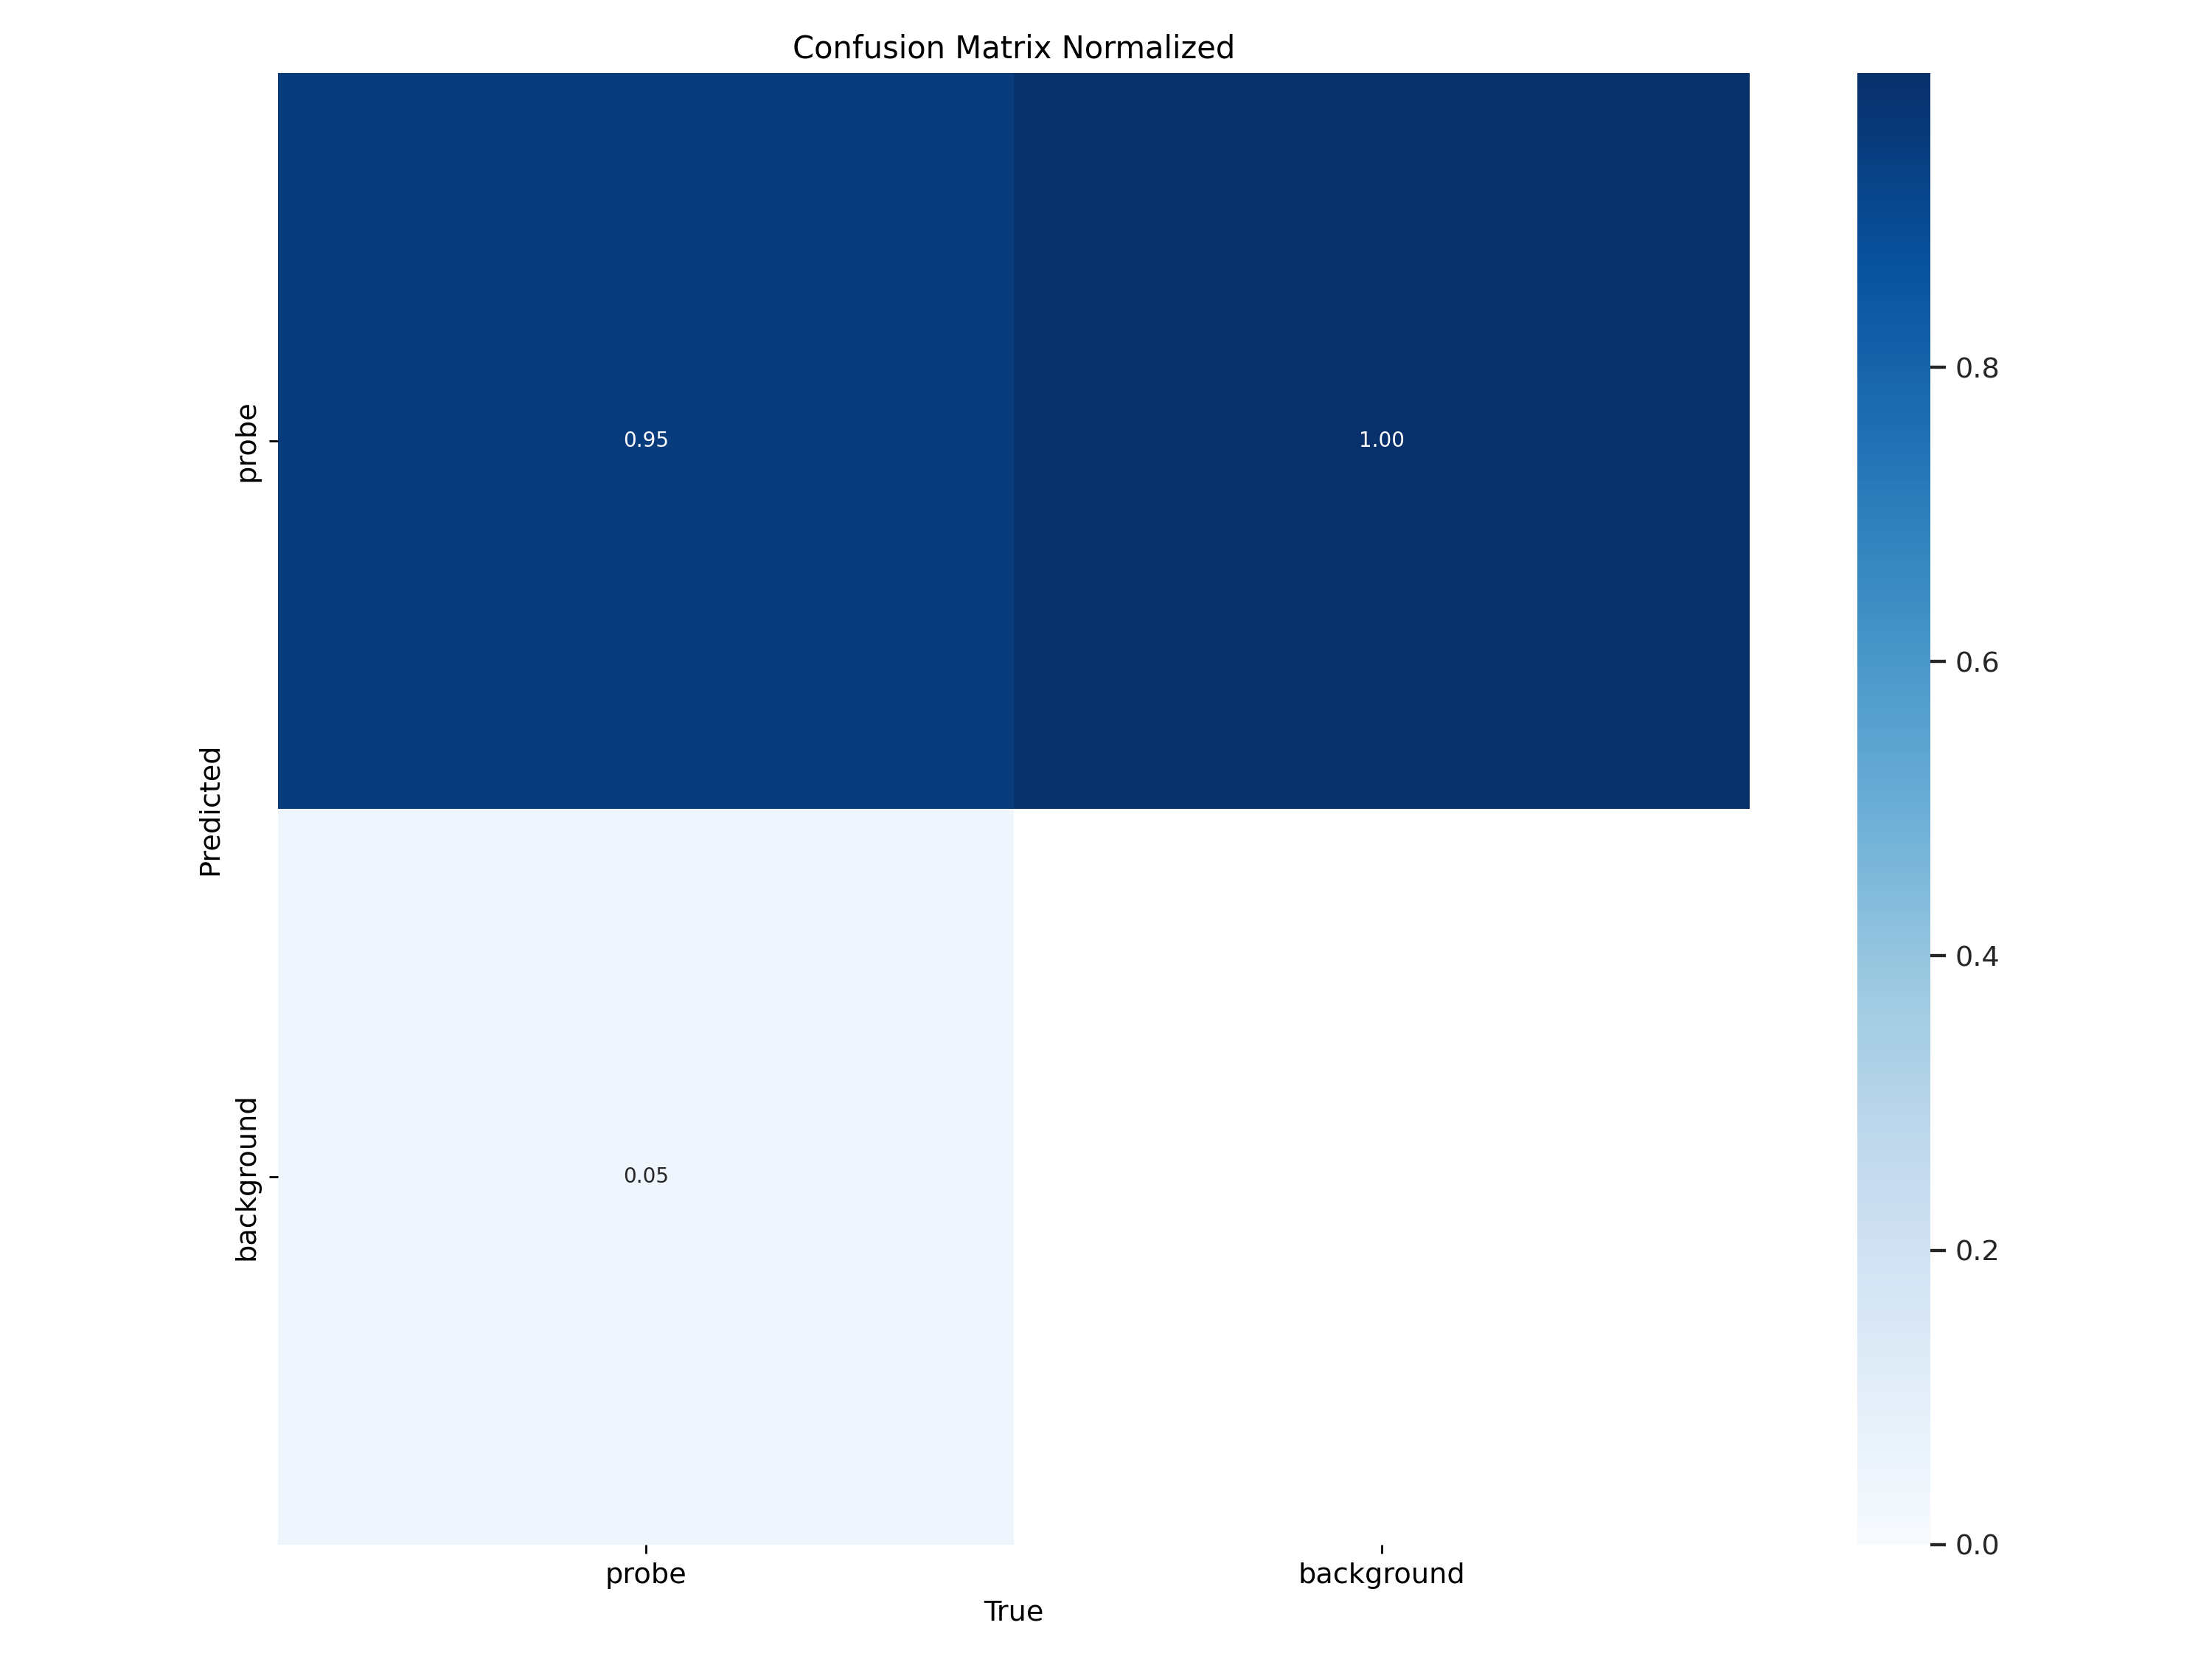

In [28]:
Image(filename=f'{TRAIN_RESULTS}/confusion_matrix_normalized.png', width=1000)

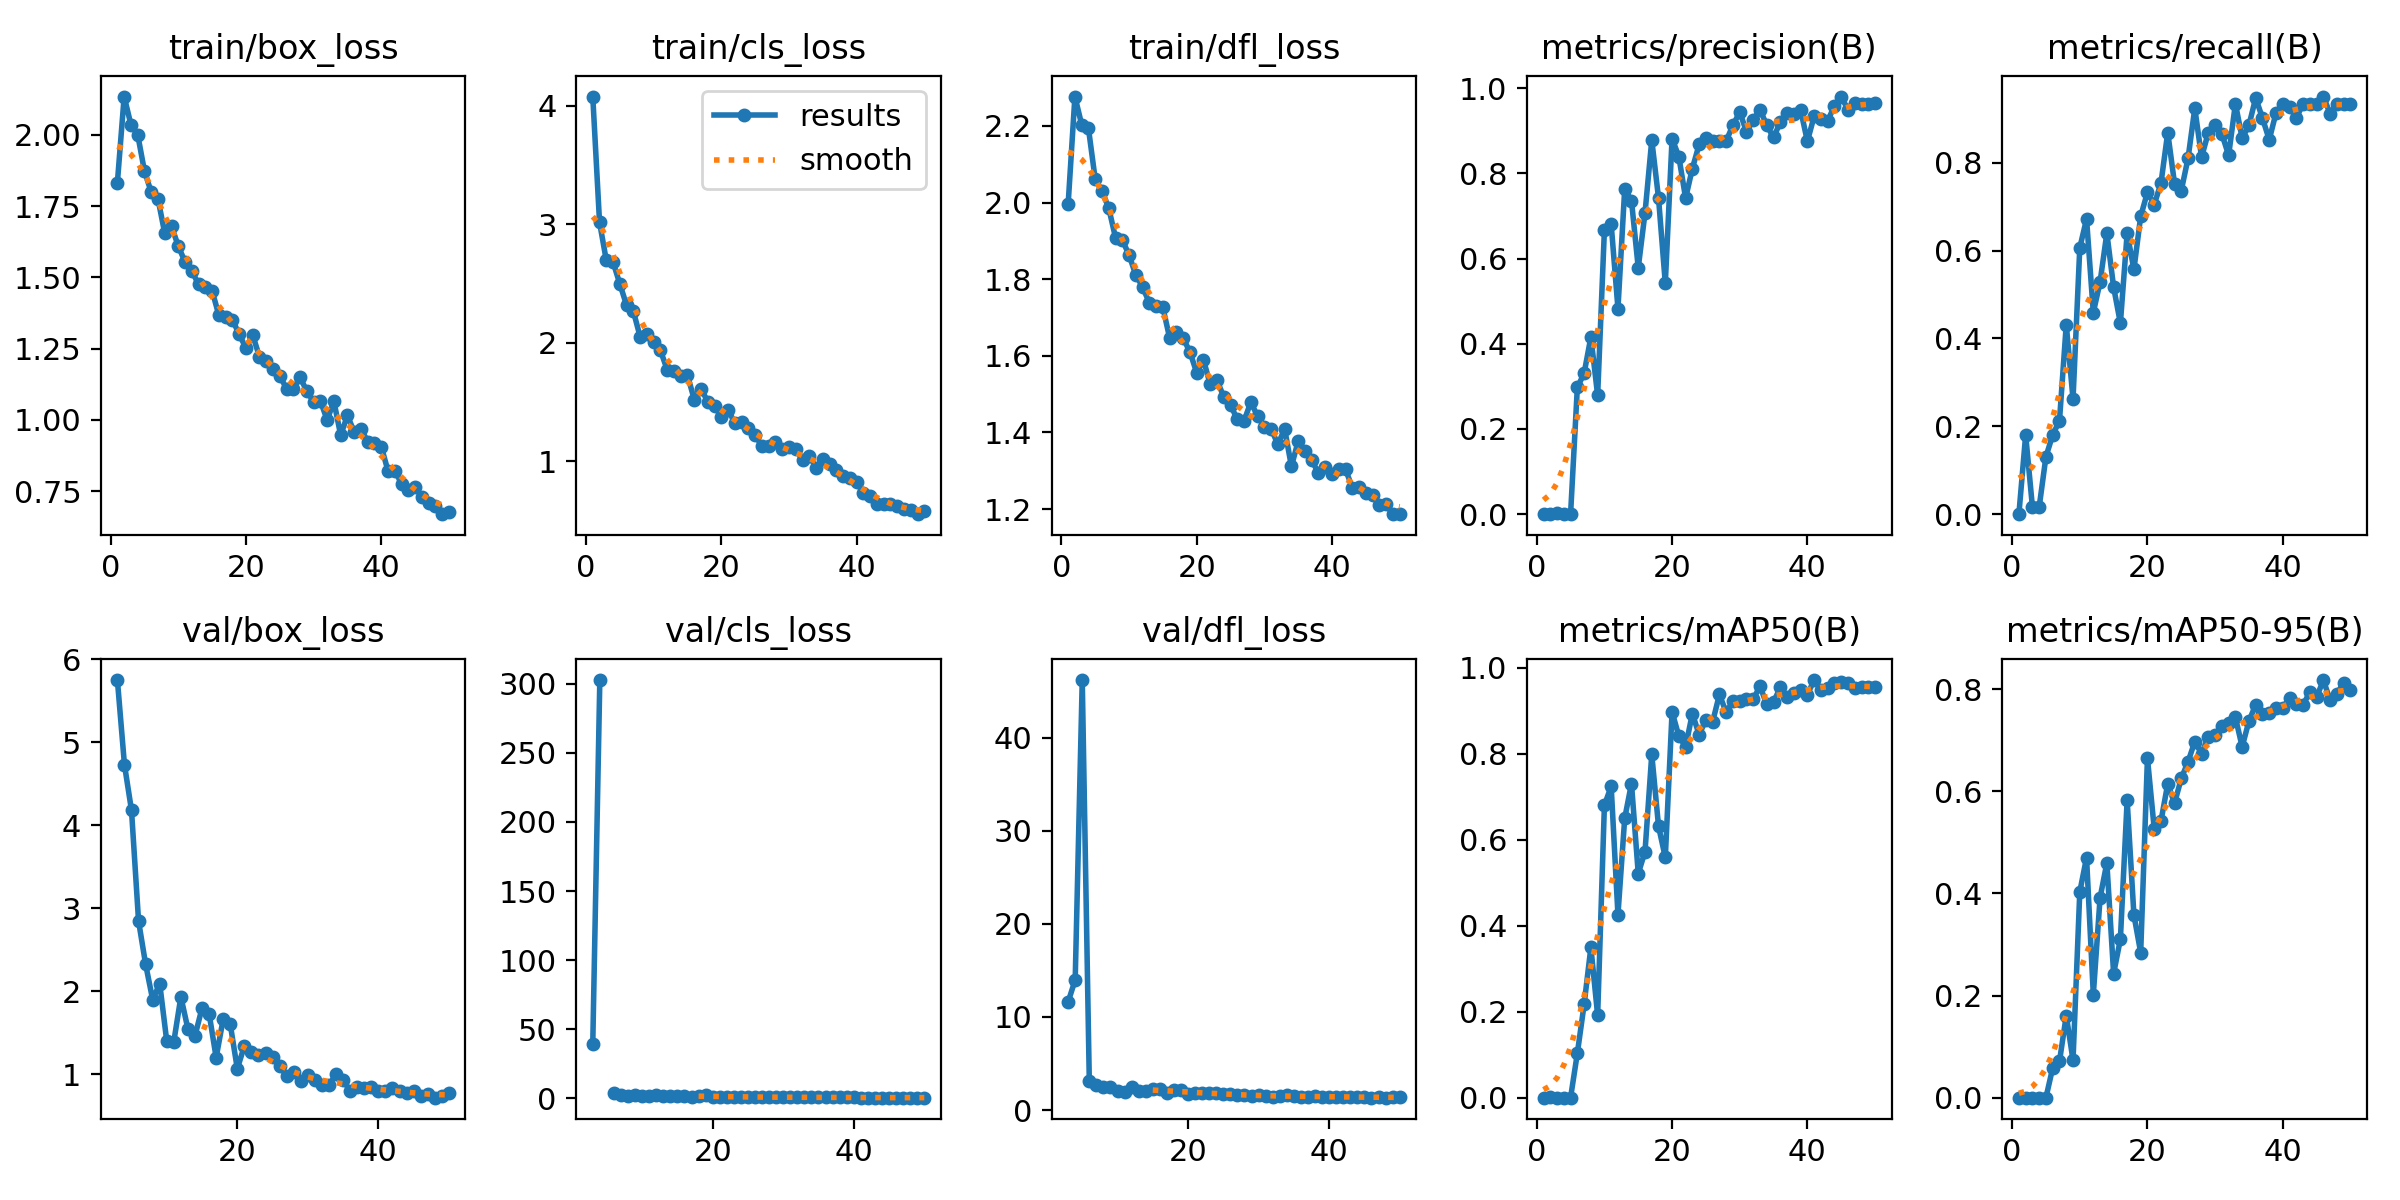

In [22]:

Image(filename=f'{TRAIN_RESULTS}/results.png', width=1000)


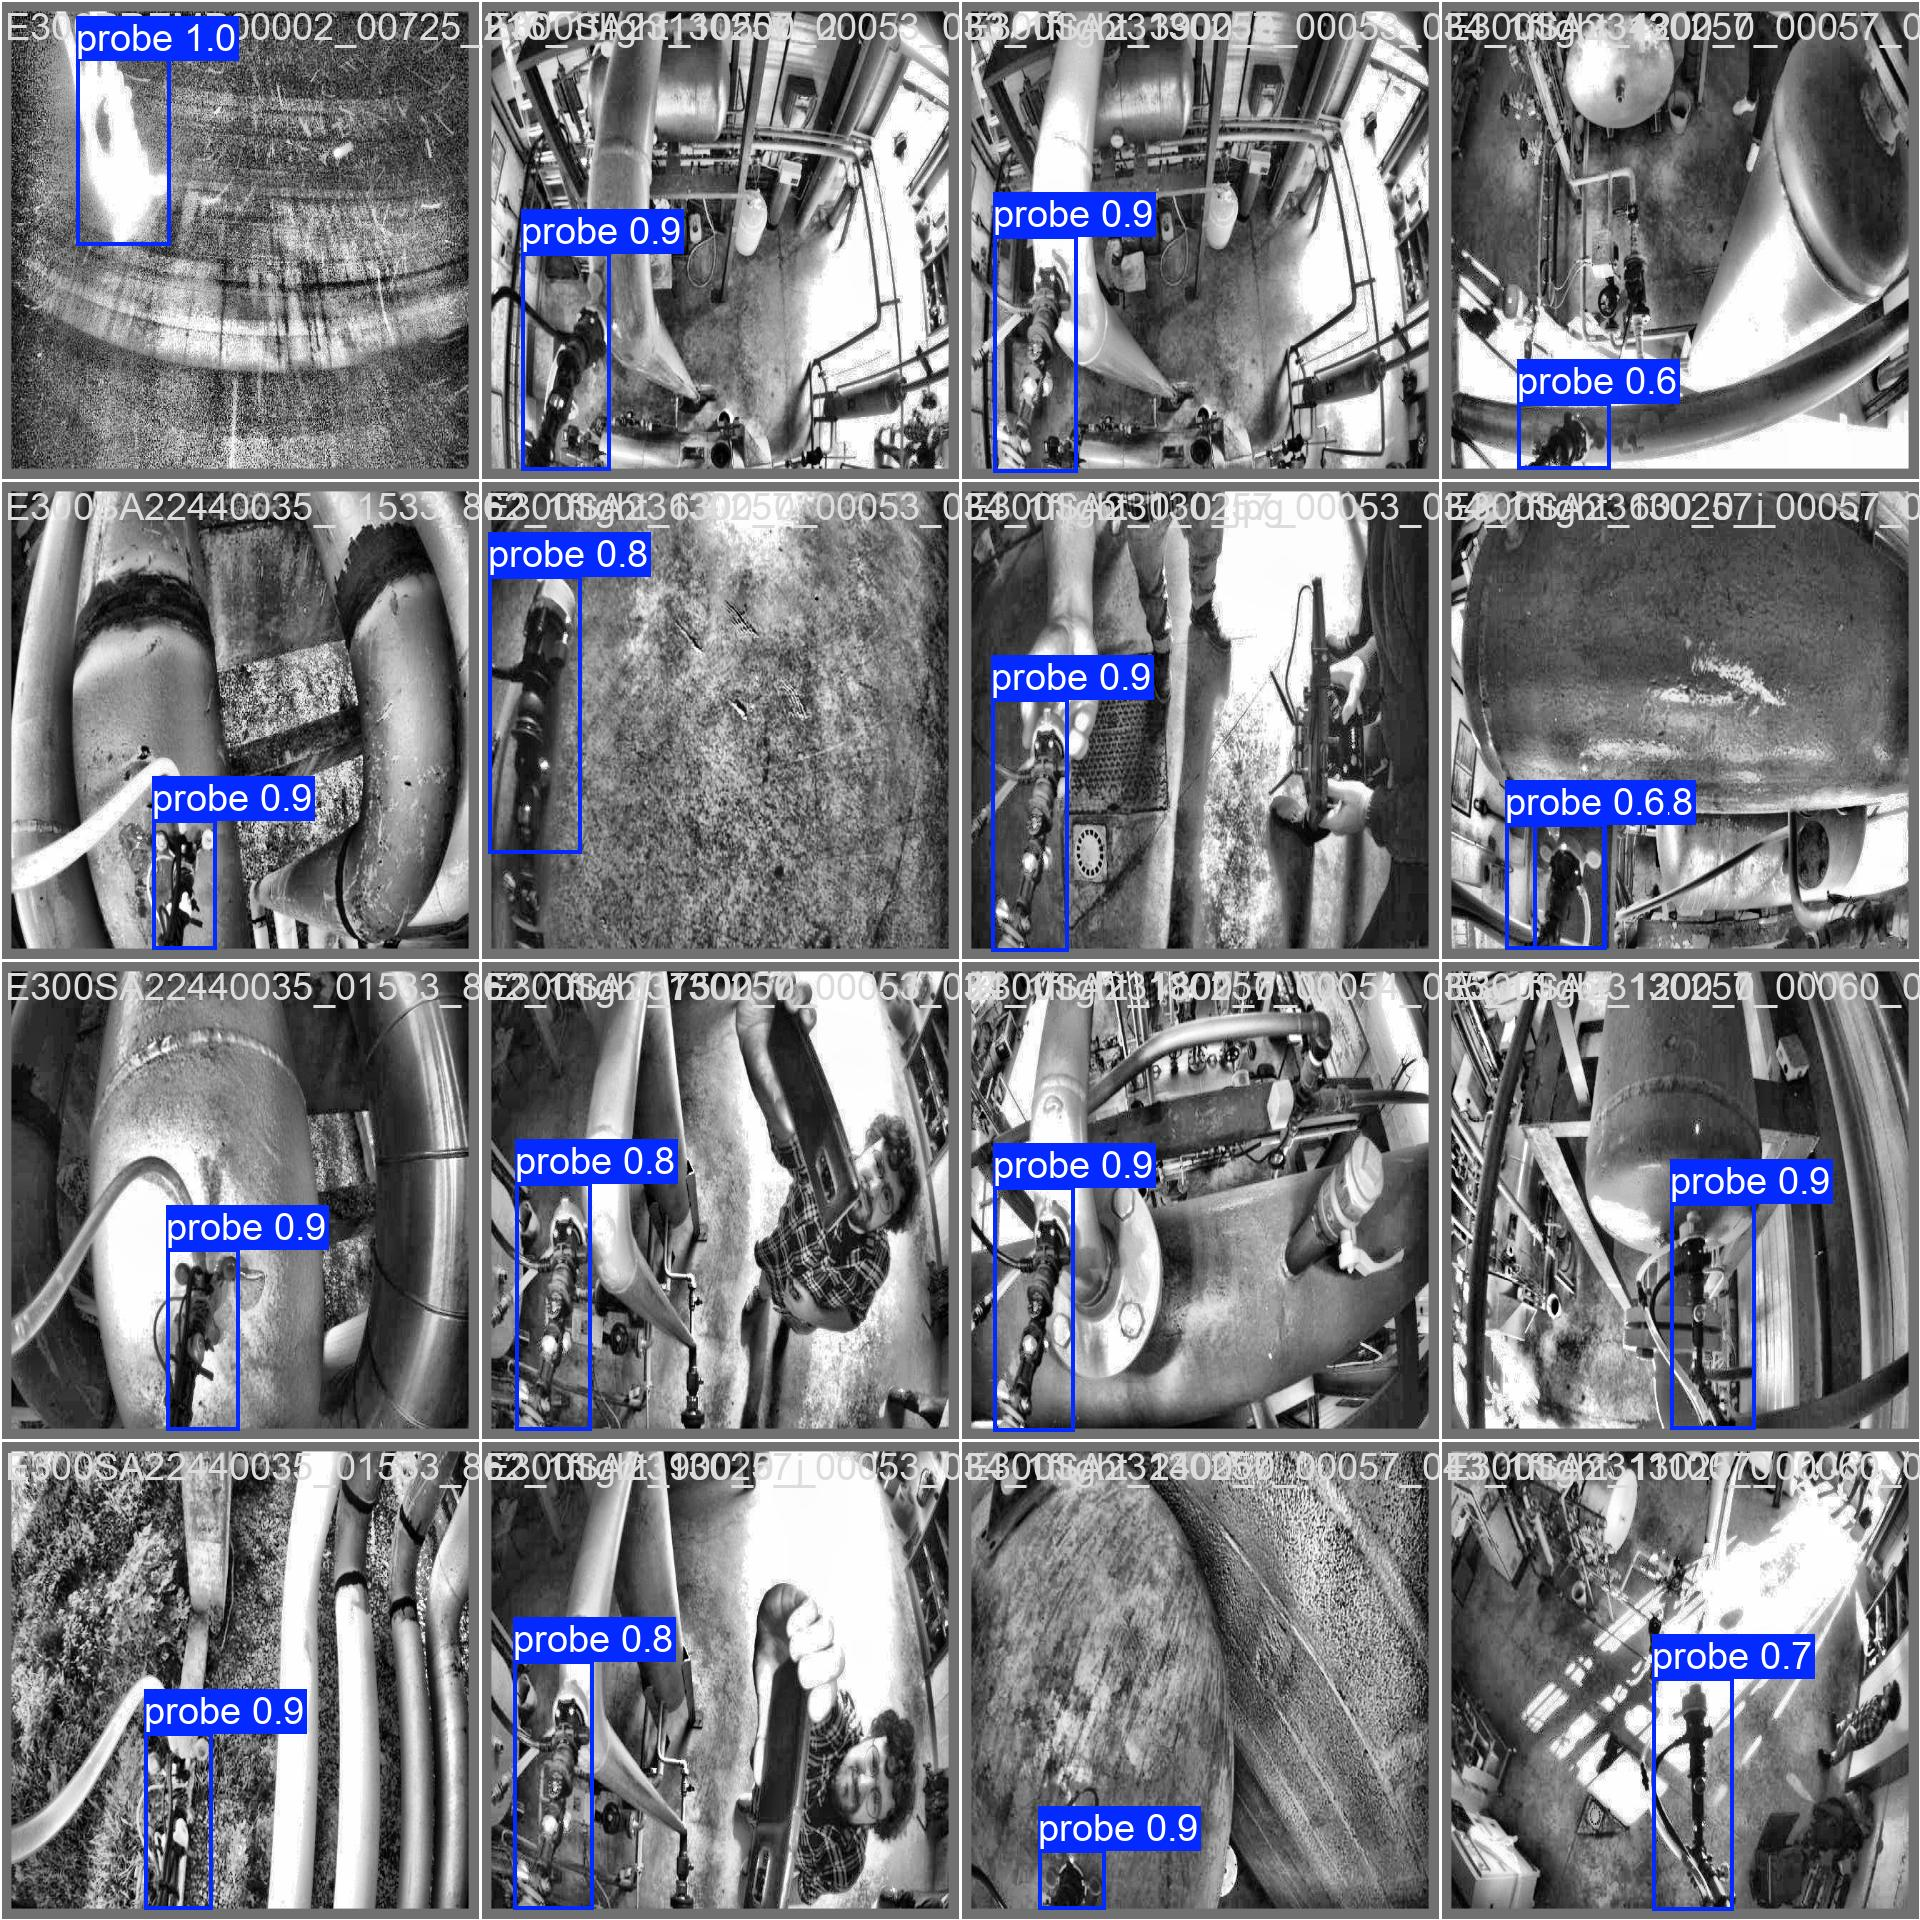

In [25]:
Image(filename=f'{TRAIN_RESULTS}/val_batch0_pred.jpg', width=1000)

### Validate Custom Model

In [27]:
# After training, perform predictions on the test set
test_images_path = os.path.join(datasets_path, 'test', 'images')  # Path to test images
best_model_path = os.path.join(datasets_path, 'runs', 'detect', 'train8', 'weights', 'best.pt')  # Path to the trained model weights
print(best_model_path)
model = YOLO(best_model_path)  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered


/home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/runs/detect/train8/weights/best.pt
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24201MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]


                   all         61         61      0.965      0.951      0.965      0.818
Speed: 0.2ms preprocess, 5.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val13


In [17]:
# Validate and predict using the trained model
model = YOLO(best_model_path)  # Load the trained model
results = model.predict(
    source=test_images_path,  # Path to test images
    conf=0.25,                # Confidence threshold for predictions
    save=True                 # Save prediction outputs
)


image 1/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00725_216_1flight_5100_2_jpg.rf.1522ac7412b954e3df6fdd11ff8bac19.jpg: 640x640 1 probe, 1.9ms
image 2/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_12600_2_jpg.rf.51e6feacb94057a1c90e10732f0e39b7.jpg: 640x640 1 probe, 2.6ms
image 3/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_1800_2_jpg.rf.d82bf9174ce69fb8995e47a19ecb8f78.jpg: 640x640 1 probe, 2.5ms
image 4/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_2400_2_jpg.rf.b679758028c46341fc5cfeacc5db574c.jpg: 640x640 1 probe, 2.4ms
image 5/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_pre

### Inference with Custom Model

In [18]:
test_model_path = os.path.join(datasets_path, 'test', 'images')  # Path to the trained model weights
model.predict(data=f"{datasets_path}/data.yaml", epochs=15, batch=16, imgsz=640, source=test_model_path, save=True )


image 1/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00725_216_1flight_5100_2_jpg.rf.1522ac7412b954e3df6fdd11ff8bac19.jpg: 640x640 1 probe, 1.1ms
image 2/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_12600_2_jpg.rf.51e6feacb94057a1c90e10732f0e39b7.jpg: 640x640 1 probe, 1.1ms
image 3/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_1800_2_jpg.rf.d82bf9174ce69fb8995e47a19ecb8f78.jpg: 640x640 1 probe, 1.1ms
image 4/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_preprocessed_YOLOv8/test/images/E300PREMP00002_00726_217_1flight_2400_2_jpg.rf.b679758028c46341fc5cfeacc5db574c.jpg: 640x640 1 probe, 1.1ms
image 5/31 /home/cjs/Documents/Probe-Detection-Using-Deep-Learning/notebook/data/probe_pre

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'probe'}
 obb: None
 orig_img: array([[[ 19,  19,  19],
         [ 14,  14,  14],
         [ 11,  11,  11],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        [[ 19,  19,  19],
         [ 14,  14,  14],
         [ 11,  11,  11],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        [[ 19,  19,  19],
         [ 14,  14,  14],
         [ 11,  11,  11],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        ...,
 
        [[105, 105, 105],
         [ 96,  96,  96],
         [ 98,  98,  98],
         ...,
         [ 47,  47,  47],
         [ 45,  45,  45],
         [ 26,  26,  26]],
 
        [[ 83,  83,  83],
         [ 85,  85,  85],
         [100, 100, 100],
         ...,
         [ 45,  45,

Look at some example test results

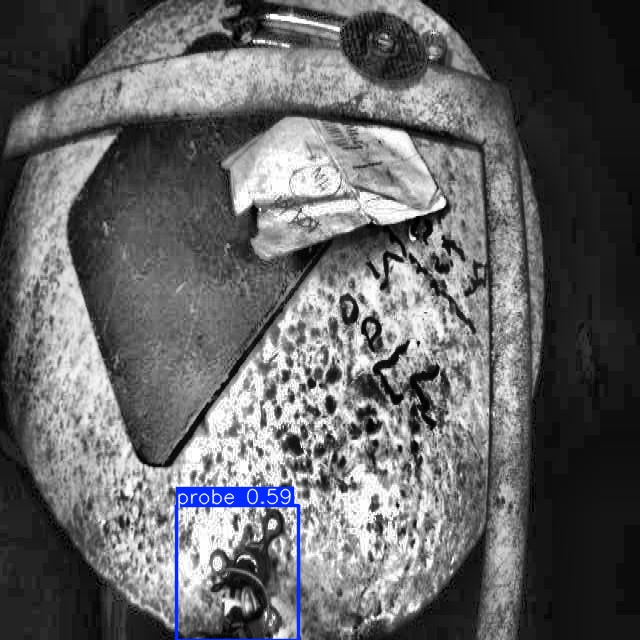

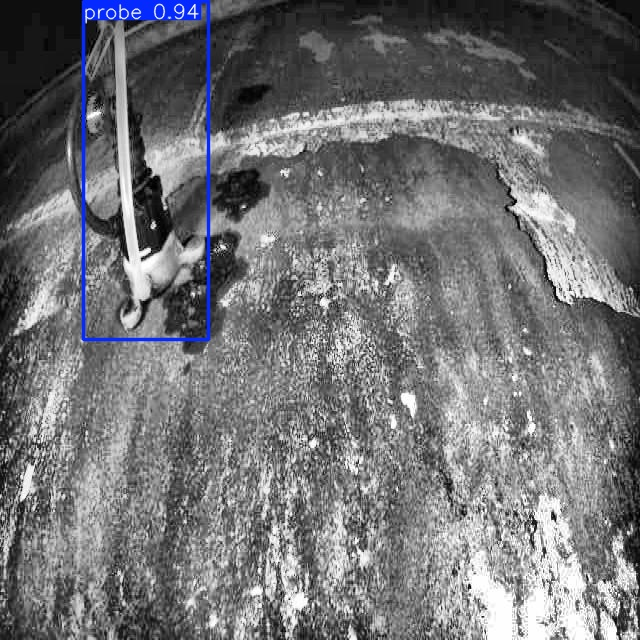

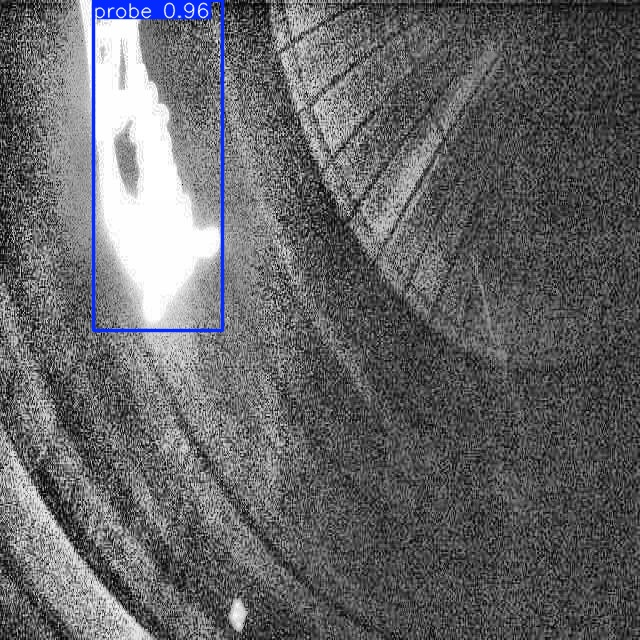

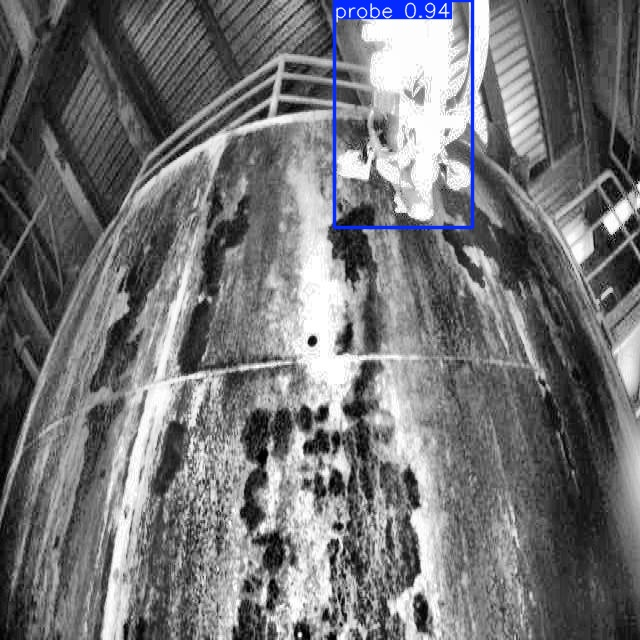

In [19]:
import glob
from IPython.display import Image, display

predict_path = os.path.join(datasets_path, 'runs', 'detect') 

    
# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(predict_path, d) for d in os.listdir(predict_path)
              if os.path.isdir(os.path.join(predict_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:4]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")